In [1]:
import pickle

In [2]:
# Open the file in binary mode
def read_pkl(fname):
    with open(fname, 'rb') as file:
        # Call load method to deserialze
        return pickle.load(file)

In [3]:
features = read_pkl("/home/ravi/PROJECTS_DATA/DataModelsResults/Results/tSNE/features_KFold_1.pkl")
labels = read_pkl("/home/ravi/PROJECTS_DATA/DataModelsResults/Results/tSNE/labels_KFold_1.pkl")

In [4]:
features.shape

(325406, 7523484)

In [5]:
labels.shape

(325406,)

In [5]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  

In [28]:
x = features.copy()
print(x.shape, type(x))

(325406, 7523484) <class 'scipy.sparse.csr.csr_matrix'>


In [29]:
x = x[0:,0:1000]
print(x.shape)
y = labels

(325406, 1000)


In [30]:
tsne = TSNE(n_components=3,
            verbose=1, 
            random_state=42,
            learning_rate='auto',
            perplexity=1,
            n_jobs=48
           )
z = tsne.fit_transform(x)

/home/ravi/miniconda3/envs/redditJournal/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 325406 samples in 0.002s...
[t-SNE] Computed neighbors for 325406 samples in 1815.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 325406
[t-SNE] Computed conditional probabilities for sample 2000 / 325406
[t-SNE] Computed conditional probabilities for sample 3000 / 325406
[t-SNE] Computed conditional probabilities for sample 4000 / 325406
[t-SNE] Computed conditional probabilities for sample 5000 / 325406
[t-SNE] Computed conditional probabilities for sample 6000 / 325406
[t-SNE] Computed conditional probabilities for sample 7000 / 325406
[t-SNE] Computed conditional probabilities for sample 8000 / 325406
[t-SNE] Computed conditional probabilities for sample 9000 / 325406
[t-SNE] Computed conditional probabilities for sample 10000 / 325406
[t-SNE] Computed conditional probabilities for sample 11000 / 325406
[t-SNE] Computed conditional probabilities for sample 12000 / 325406
[t-SNE] Computed conditional proba

In [31]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]

In [32]:
df0 = df[df["y"]==0]
print(df0.shape)
df1 = df[df["y"]==1]
print(df1.shape)
df2 = df[df["y"]==2]
print(df2.shape)

(58268, 4)
(64216, 4)
(202922, 4)


In [33]:
df0

,y,comp-1,comp-2,comp-3
81888,0,51.157757,-49.561150,-70.069763
81893,0,-8.908407,38.854935,24.281033
81894,0,11.012834,20.596247,-68.998238
81896,0,1.167068,20.135698,-100.187172
81898,0,-26.749086,57.100163,-34.164948
...,...,...,...,...
406717,0,-7.826824,-57.189034,-71.245842
406719,0,33.267120,32.786144,-79.753662
406739,0,32.806240,-18.095488,63.193878
406741,0,-53.895981,15.174205,81.656601


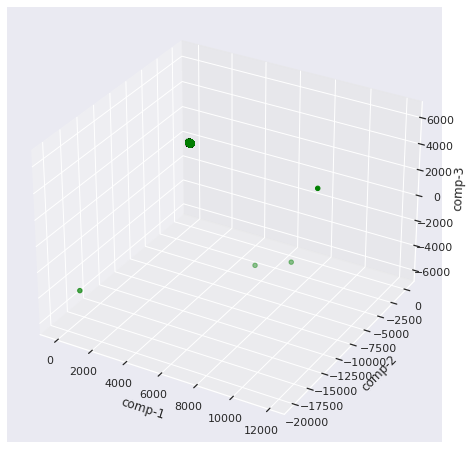

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# df = pd.read_csv('2016.csv')
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('comp-1')
ax.set_ylabel('comp-2')
ax.set_zlabel('comp-3')

sc = ax.scatter(df0['comp-1'], df0['comp-2'], df0['comp-3'], color='blue')
sc = ax.scatter(df1['comp-1'], df1['comp-2'], df1['comp-3'], color='red')
sc = ax.scatter(df2['comp-1'], df2['comp-2'], df2['comp-3'], color='green')

plt.show()

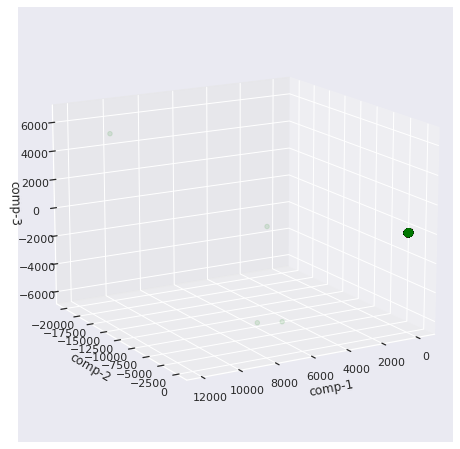

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# df = pd.read_csv('2016.csv')
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('comp-1')
ax.set_ylabel('comp-2')
ax.set_zlabel('comp-3')

sc = ax.scatter(df0['comp-1'], df0['comp-2'], df0['comp-3'], color='blue', alpha=0.9)
sc = ax.scatter(df1['comp-1'], df1['comp-2'], df1['comp-3'], color='red', alpha=0.9)
sc = ax.scatter(df2['comp-1'], df2['comp-2'], df2['comp-3'], color='green', alpha=0.1)

ax.view_init(15, 60)

plt.show()